In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class AntColony:
    def __init__(self, d, m, n_iter, ro, alpha, beta):
        self.d = d
        self.N = len(d)
        self.tau = np.ones(self.d.shape) / self.N
        self.m = m
        self.n_iter = n_iter
        self.ro = ro
        self.alpha = alpha
        self.beta = beta
        self.best_route = None
        self.best_length = float('inf')
        self.history = [] 

    # general algorithm
    def run(self):
        for _ in range(self.n_iter):
            tours = self.generate_tours()
            self.update_pheromones(tours)

            best_local_route, best_local_length = self.get_best(tours)
            if best_local_length < self.best_length:
                self.best_route = best_local_route
                self.best_length = best_local_length
            self.history.append((self.best_route, self.best_length))  # Save best route and length in history
        return self.best_route, self.best_length

    # generate all the tours by each ant and its length
    def generate_tours(self):
        tours = []
        for _ in range(self.m):
            tour = self.generate_ant_tour()
            tours.append((tour, self.total_length(tour)))
        return tours

    # generate a tour for each ant
    def generate_ant_tour(self):
        self.first_city = np.random.randint(0, self.N)
        tour = [self.first_city]
        while len(tour) < self.N:
            current_city = tour[-1]
            next_city = self.pick_next_city(current_city, tour)
            tour.append(next_city)
        return tour

    # pick the next city on the tour
    def pick_next_city(self, current_city, tour):
        pheromone = self.tau[current_city]
        distances = self.d[current_city]
        distances = np.where(np.isin(range(self.N), tour), np.inf, distances)
        probabilities = (pheromone**self.alpha) * ((1 / distances)**self.beta)
        probabilities /= probabilities.sum()
        return np.random.choice(range(self.N), p=probabilities)

    # compute total length of a tour
    def total_length(self, tour):
        length = sum(self.d[tour[i], tour[i+1]] for i in range(self.N - 1))
        length += self.d[tour[-1], tour[0]]
        return length

    # update the pheromones considering all the ants' tours
    def update_pheromones(self, tours):
        self.tau *= (1 - self.ro)
        for tour, length in tours:
            for i in range(self.N - 1):
                self.tau[tour[i], tour[i+1]] += 1 / length
                self.tau[tour[i+1], tour[i]] += 1 / length

    # find the best tour
    def get_best(self, tours):
        return min(tours, key=lambda x: x[1])


In [3]:
# cities latitudes
cities = {
    "Lisbon": (38.7169, -9.139),
    "Barcelona": (41.3851, 2.1734),
    "Paris": (48.8566, 2.3522),
    "Berlin": (52.52, 13.405),
    "Rome": (41.9028, 12.4964),
    "Vienna": (48.2082, 16.3738),
    "Copenhagen": (55.6760, 12.5683),
    "Dublin": (53.3501, -6.2662),
    "Athens": (37.9838, 23.7275),
    "Warsaw": (52.2297, 21.0122),
    "Stockholm": (59.3293, 18.0686),
    "Zurich": (47.3686, 8.5392)
}

latitudes = np.array([coord[0] for coord in cities.values()])
longitudes = np.array([coord[1] for coord in cities.values()])

# rescale to [0, 1] x [0,1]
latitudes_rescaled = (latitudes - latitudes.min()) / (latitudes.max() - latitudes.min())
longitudes_rescaled = (longitudes - longitudes.min()) / (longitudes.max() - longitudes.min())

# [0.1, 0.9] to avoid edge placement
scale_factor = 0.8  # Scale range
offset = 0.1  # Offset for margin
latitudes_scaled = latitudes_rescaled * scale_factor + offset
longitudes_scaled = longitudes_rescaled * scale_factor + offset

scaled_cities_swapped = {
    city: (lon, lat)  # Swap longitude and latitude
    for city, lat, lon in zip(cities.keys(), latitudes_scaled, longitudes_scaled)
}

cities = []

for city, (x,y) in scaled_cities_swapped.items():
    cities.append([x,y])

cities = np.array(cities)

In [4]:
# solution from brute - force solver
sol = 3.262625099227092

In [5]:
# distances calculation
diff = cities[:, np.newaxis, :] - cities[np.newaxis, :, :]
d = np.sqrt(np.sum(diff**2, axis=-1))

# optimal solution finding
ant_colony = AntColony(d, m=2, n_iter=100, ro=0.1, alpha=1, beta=2)

best_tour, best_length = ant_colony.run() 

print(f"Best tour: {best_tour}")
print(f"Best length: {best_length}")

print(abs(best_length-sol) < 10**(-5))

Best tour: [7, 2, 11, 5, 3, 6, 10, 9, 8, 4, 1, 0]
Best length: 3.333159063818237
False


In [6]:
primer_tour = ant_colony.history[0][0]

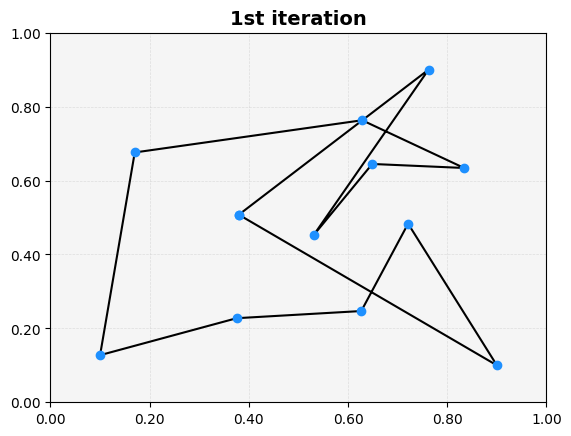

In [7]:
# 1st iteration trajectory
primer_tour += [primer_tour[0]]
l_grafico = [cities[x] for x in primer_tour]

l_x = [l_grafico[i][0] for i in range(len(cities)+1)]
l_y = [l_grafico[i][1] for i in range(len(cities)+1)]

plt.plot(l_x, l_y, 'k-') 
plt.plot(l_x, l_y, 'o',color='dodgerblue')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.linspace(0, 1, 6), labels=[f"{tick:.2f}" for tick in np.linspace(0, 1, 6)], fontsize=10)
plt.yticks(np.linspace(0, 1, 6), labels=[f"{tick:.2f}" for tick in np.linspace(0, 1, 6)], fontsize=10)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.title('1st iteration', fontsize=14, fontweight='bold', color='black')
plt.gca().set_facecolor('whitesmoke')

#plt.savefig('14.pdf', dpi=300, bbox_inches='tight')

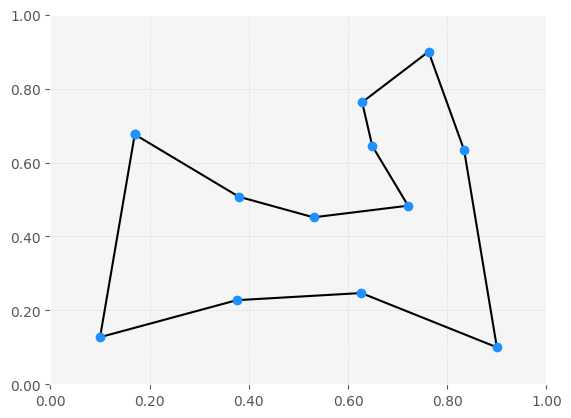

In [8]:
# last iteration trajectory
best_tour += [best_tour[0]]
l_grafico = [cities[x] for x in best_tour]

l_x = [l_grafico[i][0] for i in range(len(cities)+1)]
l_y = [l_grafico[i][1] for i in range(len(cities)+1)]

plt.style.use('ggplot')
plt.plot(l_x, l_y, 'k-') 
plt.plot(l_x, l_y, 'o', color='dodgerblue')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.linspace(0, 1, 6), labels=[f"{tick:.2f}" for tick in np.linspace(0, 1, 6)], fontsize=10)
plt.yticks(np.linspace(0, 1, 6), labels=[f"{tick:.2f}" for tick in np.linspace(0, 1, 6)], fontsize=10)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7, zorder=1)
plt.gca().set_facecolor('whitesmoke') 
plt.show()

In [9]:
#cities_df = pd.DataFrame(cities, columns=['x', 'y'])
#cities_df['city'] = range(len(cities))  

#cities_df = cities_df[['city', 'x', 'y']]

#cities_df.to_csv('random_cities.csv', index=False)

#history_data = [(tour, length) for tour, length in ant_colony.history]
#df = pd.DataFrame(history_data, columns=["tour", "length"])

#df.to_csv("ant_colony_history.csv", index=False)